In [2]:
'''Sentiment of the tweets from October regarding the 2020 elections'''

'Sentiment of the tweets from October regarding the 2020 elections'

In [1]:
import sys
import os
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import glob
import json


In [3]:
path = r'C:\Users\m216126\Documents\capstoneStuff\twitterCapture\captures\october'      # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
li = []
for file in all_files:
    df = pd.read_csv(file, index_col = None, header=0)
    li.append(df)

In [4]:
# Naming the columns

for i in range(len(li)):
    li[i].columns = ['Date','id','tweet','tweet_info','metadata']

In [5]:
## Concatenate all the files into a single dataset

frames = []

for i in range(len(li)):
    frames.append(li[i])
tweet_dataset = pd.concat(frames, ignore_index=True)

In [6]:
tweet_dataset.shape 

(458048, 5)

In [7]:
tweet_dataset.tail(200)

,Date,id,tweet,tweet_info,metadata
457848,2020-10-09 19:59:40,1314656796934639624,b'@TeamPelosi 6) President Trump acting in \xe...,User(_api=<tweepy.api.API object at 0x10c9aab9...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
457849,2020-10-09 19:59:40,1314656796905295872,b'RT @MeidasTouch: \xf0\x9f\x93\xba NEW VIDEO\...,User(_api=<tweepy.api.API object at 0x10c9aab9...,"{'hashtags': [{'text': 'TrumpVirus', 'indices'..."
457850,2020-10-09 19:59:40,1314656796871720966,b'RT @MandyStefanian: The U.S. needs to step i...,User(_api=<tweepy.api.API object at 0x10c9aab9...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
457851,2020-10-09 19:59:40,1314656796754276353,b'RT @causekryssaidso: YALL so APPARENTLY my s...,User(_api=<tweepy.api.API object at 0x10c9aab9...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
457852,2020-10-09 19:59:40,1314656796712284162,"b""Trump: Pence's best debate answer was balkin...",User(_api=<tweepy.api.API object at 0x10c9aab9...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
...,...,...,...,...,...
458043,2020-10-09 19:59:38,1314656788881440769,b'RT @RAICESTEXAS: The Trump administration en...,User(_api=<tweepy.api.API object at 0x10c9aab9...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
458044,2020-10-09 19:59:38,1314656788877381632,"b'RT @RudyGiuliani: Joe Biden: ""You\xe2\x80\x9...",User(_api=<tweepy.api.API object at 0x10c9aab9...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
458045,2020-10-09 19:59:38,1314656788877377536,"b'@mlow29 No idea, but the hope was by the end...",User(_api=<tweepy.api.API object at 0x10c9aab9...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
458046,2020-10-09 19:59:38,1314656788856352768,b'RT @AdamWollner: The Biden campaign is curre...,User(_api=<tweepy.api.API object at 0x10c9aab9...,"{'hashtags': [], 'symbols': [], 'user_mentions..."


In [8]:
# Cleaning Up the tweets

searched_tweets = []

for i in range(0,int(tweet_dataset.shape[0])):
    try:
        if tweet_dataset['tweet'][i] != None: 
            tweet = re.sub('[^a-zA-Z0-9]', ' ', str(tweet_dataset['tweet'][i]))
            tweet = re.sub("b'", '', tweet)
            tweet = re.sub('https', '', tweet)
            tweet = tweet.split()
            for j in range(len(tweet)):
                if len(tweet[j]) <= 3:
                    tweet[j] = ''
                elif (len(tweet[j]) == 4) and (tweet[j][0]=='x'):
                    tweet[j] = ''
                elif (len(tweet[j]) == 5) and (tweet[j][0]=='x'):
                    tweet[j] = ''
            tweet = ' '.join(tweet)
            searched_tweets.append(tweet)
    except:
        continue

In [9]:
print(len(searched_tweets))

458048


In [10]:
#Sentiment Analysis Report of all the tweets from november with hashtags related to the elections

#Finding sentiment analysis (+ve, -ve and neutral)
pos = 0
neg = 0
neu = 0
for tweet in searched_tweets:
    try:
        analysis = TextBlob(tweet)
        if analysis.sentiment[0]>0:
           pos = pos +1
        elif analysis.sentiment[0]<0:
           neg = neg + 1
        else:
           neu = neu + 1
    except:
        continue
print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

Total Positive =  152368
Total Negative =  86197
Total Neutral =  219483


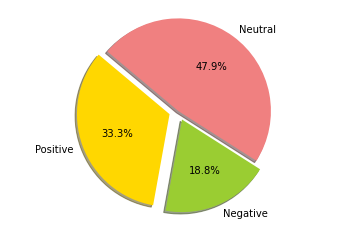

In [11]:
#Plotting sentiments
labels = 'Positive', 'Negative', 'Neutral'
sizes = [pos, neg, neu]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()